In [282]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations

# QI, DI and NB incides calculation

In [283]:
df_food = pd.read_csv("df_food_filtered_with_food_group.csv",index_col=0)
with open("df_food_openfoodfacts_merged.pkl", "rb") as f:
    df_food_openfoodfacts = pickle.load(f, encoding="latin1")

C:\Users\Sophie\AppData\Local\Temp\ipykernel_4164\1585345951.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv("df_food_filtered_with_food_group.csv",index_col=0)


In [284]:
df_food = df_food[df_food["eaten_quantity_in_gram"] > 0]
df_food = df_food[df_food["energy_kcal_eaten"] > 0]

In [285]:

df_food.columns

Index(['food_id', 'barcode', 'dish_id', 'eaten_quantity', 'eaten_unit',
       'subject_key', 'eaten_at', 'eaten_at_utc_offset', 'media_count',
       'food_group_cname', 'type', 'display_name_en', 'display_name_fr',
       'display_name_de', 'fallback_food_id', 'standard_portion_quantity',
       'standard_portion_unit', 'specific_gravity', 'alcohol',
       'all_trans_retinol_equivalents_activity', 'beta_carotene',
       'beta_carotene_activity', 'calcium', 'carbohydrates', 'chloride',
       'cholesterol', 'energy_kcal', 'energy_kj', 'fat',
       'fatty_acids_monounsaturated', 'fatty_acids_polyunsaturated',
       'fatty_acids_saturated', 'fiber', 'folate', 'iodide', 'iron',
       'magnesium', 'niacin', 'pantothenic_acid', 'phosphorus', 'potassium',
       'protein', 'salt', 'sodium', 'starch', 'sugar', 'vitamin_a_activity',
       'vitamin_b1', 'vitamin_b12', 'vitamin_b2', 'vitamin_b6', 'vitamin_c',
       'vitamin_d', 'vitamin_e_activity', 'water', 'zinc',
       'eaten_quantit

In [286]:
df_food[[i for i in df_food.columns if 'eaten' in i]].columns

Index(['eaten_quantity', 'eaten_unit', 'eaten_at', 'eaten_at_utc_offset',
       'eaten_quantity_in_gram', 'energy_kcal_eaten', 'energy_kj_eaten',
       'carb_eaten', 'fat_eaten', 'protein_eaten', 'fiber_eaten',
       'alcohol_eaten', 'local_eaten_at', 'eaten_date',
       'all_trans_retinol_equivalents_activity_eaten', 'beta_carotene_eaten',
       'calcium_eaten', 'cholesterol_eaten',
       'fatty_acids_monounsaturated_eaten',
       'fatty_acids_polyunsaturated_eaten', 'fatty_acids_saturated_eaten',
       'folate_eaten', 'iron_eaten', 'magnesium_eaten', 'niacin_eaten',
       'pantothenic_acid_eaten', 'phosphorus_eaten', 'potassium_eaten',
       'salt_eaten', 'sodium_eaten', 'sugar_eaten', 'vitamin_b1_eaten',
       'vitamin_b12_eaten', 'vitamin_b2_eaten', 'vitamin_b6_eaten',
       'vitamin_c_eaten', 'vitamin_d_eaten', 'vitamin_e_activity_eaten',
       'zinc_eaten'],
      dtype='object')

In [287]:
df_food

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,vitamin_b12_eaten,vitamin_b2_eaten,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,vitamin_e_activity_eaten,zinc_eaten,start_date,cohort,food_group
0,13,NaN,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,2.310000e-06,0.000275,0.000154,0.00000,0.000000e+00,0.220,0.004730,2022-02-04,cohort_b,meat_fish_seafood
3,13,NaN,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,2.100000e-06,0.000250,0.000140,0.00000,0.000000e+00,0.200,0.004300,2023-01-10,cohort_b,meat_fish_seafood
4,25,NaN,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.000000e+00,0.000010,0.000028,0.00315,0.000000e+00,0.035,0.000035,2021-03-22,cohort_b,fruits
5,25,NaN,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.000000e+00,0.000010,0.000028,0.00315,0.000000e+00,0.035,0.000035,2021-10-19,cohort_b,fruits
6,25,NaN,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.000000e+00,0.000012,0.000032,0.00360,0.000000e+00,0.040,0.000040,2021-09-10,cohort_b,fruits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,sweets_desserts
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,sweets_desserts
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,3.800000e-07,0.000210,0.000000,0.00000,7.500000e-07,0.000,0.000000,2023-02-12,cohort_b,yogurt_fresh_dairy
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000e+00,0.000000,0.000000,0.01200,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,vegetable_fruit_juices


In [288]:
nutrient_info = {
    'folate_eaten':                                         {'unit': 'mcg', 'target': 400,  'type': 'qualifying'},
    'niacin_eaten':                                         {'unit': 'mg',  'target': 14,   'type': 'qualifying'},
    'pantothenic_acid_eaten':                               {'unit': 'mg',  'target': 5,    'type': 'qualifying'},
    'vitamin_b2_eaten':                                     {'unit': 'mg',  'target': 1.1,  'type': 'qualifying'},
    'vitamin_b1_eaten':                                     {'unit': 'mg',  'target': 1.2,  'type': 'qualifying'},
    'all_trans_retinol_equivalents_activity_eaten':         {'unit': 'IU',  'target': 700,  'type': 'qualifying'},
    'beta_carotene_eaten':                                  {'unit' : 'mcg','target' : 700, 'type' :'qualifying'},
    'vitamin_b12_eaten':                                    {'unit': 'mcg', 'target': 2.4,  'type': 'qualifying'},
    'vitamin_b6_eaten':                                     {'unit': 'mg',  'target': 1.3,  'type': 'qualifying'},
    'vitamin_c_eaten':                                      {'unit': 'mg',  'target': 75,   'type': 'qualifying'},
    'vitamin_d_eaten':                                      {'unit': 'mcg', 'target': 7.5,  'type': 'qualifying'},
    'vitamin_e_activity_eaten':                             {'unit': 'TAE', 'target': 15,    'type': 'qualifying'},
    'calcium_eaten':                                        {'unit': 'mg',  'target': 1000, 'type': 'qualifying'},
    'iron_eaten':                                           {'unit': 'mg',  'target': 18,   'type': 'qualifying'},
    'magnesium_eaten':                                      {'unit': 'mg',  'target': 320,  'type': 'qualifying'},
    'phosphorus_eaten':                                     {'unit': 'mg',  'target': 700,  'type': 'qualifying'},
    'potassium_eaten':                                      {'unit': 'mg',  'target': 4700, 'type': 'qualifying'},
    'zinc_eaten':                                           {'unit': 'mg',  'target': 8,    'type': 'qualifying'},
    'fiber_eaten':                                          {'unit': 'g',   'target': 25,   'type': 'qualifying'},
    'protein_eaten':                                        {'unit': 'g',   'target': 46,   'type': 'qualifying'},
    'fat_eaten':                                            {'unit': 'g',   'target': 78,   'type': 'disqualifying'},
    'fatty_acids_saturated_eaten':                          {'unit': 'g',   'target': 22,   'type': 'disqualifying'},
    'cholesterol_eaten':                                    {'unit': 'mg',  'target': 300,  'type': 'disqualifying'},
    'sugar_eaten':                                          {'unit': 'g',   'target': 125,  'type': 'disqualifying'},
    'sodium_eaten':                                         {'unit': 'mg',  'target': 2400, 'type': 'disqualifying'},
    'salt_eaten' :                                          {'unit' : 'g',  'target': 6,   'type': 'disqualifying'}
}

conversion_factors = {
    "mg": 1000,
    "g": 1,
    "mcg": 1000000,
    "IU": 1,
    "TAE": 1,
}

In [289]:
df_food['beta_carotene_eaten'].describe()

count    317780.000000
mean          0.000147
std           0.000782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000022
max           0.034995
Name: beta_carotene_eaten, dtype: float64

In [290]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [291]:
def scale_for_nbc(df, nutrient_cols, scaling_factor=2000):
    df = df.copy()

    for nutr in nutrient_cols:
        conversion_factor = conversion_factors[nutrient_info[nutr]['unit']]
        #print(conversion_factor)

        df[nutr + "_scaled"] = (
            df[nutr]
            * (scaling_factor / df["energy_kcal_eaten"])
            * conversion_factor
        )
        #if nutr == "beta_carotene_eaten":
            #print(f'df[nutr + "_scaled"] = ({df[nutr]} * ({scaling_factor} / {df["energy_kcal_eaten"]})* {conversion_factor})')

    return df


df_food_scaled = scale_for_nbc(df_food.fillna(0), list(nutrient_info.keys()), scaling_factor=2000)

In [292]:
for i in df_food_scaled.columns :
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

In [293]:
#good_df = pd.read_csv('t.csv',sep =',')
#good_df

In [294]:
df_food_scaled[[i for i in df_food_scaled if 'scaled' in i]].columns

Index(['folate_eaten_scaled', 'niacin_eaten_scaled',
       'pantothenic_acid_eaten_scaled', 'vitamin_b2_eaten_scaled',
       'vitamin_b1_eaten_scaled',
       'all_trans_retinol_equivalents_activity_eaten_scaled',
       'beta_carotene_eaten_scaled', 'vitamin_b12_eaten_scaled',
       'vitamin_b6_eaten_scaled', 'vitamin_c_eaten_scaled',
       'vitamin_d_eaten_scaled', 'vitamin_e_activity_eaten_scaled',
       'calcium_eaten_scaled', 'iron_eaten_scaled', 'magnesium_eaten_scaled',
       'phosphorus_eaten_scaled', 'potassium_eaten_scaled',
       'zinc_eaten_scaled', 'fiber_eaten_scaled', 'protein_eaten_scaled',
       'fat_eaten_scaled', 'fatty_acids_saturated_eaten_scaled',
       'cholesterol_eaten_scaled', 'sugar_eaten_scaled', 'sodium_eaten_scaled',
       'salt_eaten_scaled'],
      dtype='object')

In [389]:
def calculate_qi_ratios(row, nutrient_cols):

    qi_ratios = {}
    for nutr in nutrient_cols:
        qi_ratios[nutr + "_ratio"] = row[nutr + '_scaled'] / nutrient_info[nutr]['target']

    qi_ratios["QI"] = np.sum([i for i in qi_ratios.values()]) / len(nutrient_cols)
    
    #qi_ratios["QI"] = np.median([i for i in qi_ratios.values()])

    qi_ratios["combined_name"] = row["combined_name"]
    qi_ratios["food_group"] = row["food_group"]
    qi_ratios["energy_kcal_eaten"] = row["energy_kcal_eaten"]
    qi_ratios["eaten_quantity_in_gram"] = row["eaten_quantity_in_gram"]

    return qi_ratios

In [390]:
def calculate_di_ratios(row, nutrient_cols):

    di_ratios = {}
    for nutr in nutrient_cols:
        di_ratios[nutr + "_ratio"] = row[nutr + '_scaled'] / nutrient_info[nutr]['target']

    di_ratios["DI"] = np.sum([i for i in di_ratios.values()]) / len(nutrient_cols)    

    #di_ratios["DI"] = np.median([i for i in di_ratios.values()])

    di_ratios["combined_name"] = row["combined_name"]
    di_ratios["food_group"] = row["food_group"]
    #di_ratios["energy_kcal_eaten"] = row["energy_kcal_eaten"]
    #di_ratios["eaten_quantity_in_gram"] = row["eaten_quantity_in_gram"]

    return di_ratios

In [391]:
def calculate_nb(row, nutrient_cols):
    
    qi = calculate_qi_ratios(row, nutrient_cols)
    
    nb_ratios = {}
    
    for nutrient in nutrient_cols:
      nb_ratios[nutrient + '_truncated'] = min(qi[nutrient + '_ratio'], 1)

    
    nb_ratios["NB"] = np.sum([i for i in nb_ratios.values()]) / len(nutrient_cols)
    #nb_ratios['NB'] = np.median([i for i in nb_ratios.values()]) * 100

    nb_ratios["combined_name"] = qi["combined_name"]
    nb_ratios["food_group"] = qi["food_group"]
    #nb_ratios["energy_kcal_eaten"] = qi["energy_kcal_eaten"]
    #nb_ratios["eaten_quantity_in_gram"] = qi["eaten_quantity_in_gram"]


    return nb_ratios

In [392]:
qi_ratios = df_food_scaled.apply(calculate_qi_ratios, axis=1, nutrient_cols=qualifying_nutrients)

qi_ratios = qi_ratios.apply(pd.Series)

qi_ratios 


,folate_eaten_ratio,niacin_eaten_ratio,pantothenic_acid_eaten_ratio,vitamin_b2_eaten_ratio,vitamin_b1_eaten_ratio,all_trans_retinol_equivalents_activity_eaten_ratio,beta_carotene_eaten_ratio,vitamin_b12_eaten_ratio,vitamin_b6_eaten_ratio,vitamin_c_eaten_ratio,...,phosphorus_eaten_ratio,potassium_eaten_ratio,zinc_eaten_ratio,fiber_eaten_ratio,protein_eaten_ratio,QI,combined_name,food_group,energy_kcal_eaten,eaten_quantity_in_gram
0,0.872483,5.848514,1.879195,3.050641,1.118568,0.230105,0.095877,11.744966,1.445534,0.000000,...,4.218600,0.856776,7.214765,0.000000,7.936971,2.498497,"Lamb, filet, pan fried, medium, without additi...",meat_fish_seafood,163.90,110.0
3,0.872483,5.848514,1.879195,3.050641,1.118568,0.230105,0.095877,11.744966,1.445534,0.000000,...,4.218600,0.856776,7.214765,0.000000,7.936971,2.498497,"Lamb, filet, pan fried, medium, without additi...",meat_fish_seafood,149.00,100.0
4,0.686275,0.756303,1.333333,1.069519,1.960784,0.000000,0.000000,0.000000,2.413273,4.705882,...,0.616246,1.084689,0.490196,2.196078,0.341006,1.047794,"Pineapple, unsweetened, canned",fruits,17.85,35.0
5,0.686275,0.756303,1.333333,1.069519,1.960784,0.000000,0.000000,0.000000,2.413273,4.705882,...,0.616246,1.084689,0.490196,2.196078,0.341006,1.047794,"Pineapple, unsweetened, canned",fruits,17.85,35.0
6,0.686275,0.756303,1.333333,1.069519,1.960784,0.000000,0.000000,0.000000,2.413273,4.705882,...,0.616246,1.084689,0.490196,2.196078,0.341006,1.047794,"Pineapple, unsweetened, canned",fruits,20.40,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.886544,0.917747,0.090215,Alnatura - Kakao Knusper Reis,sweets_desserts,60.64,16.0
514956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.886544,0.917747,0.090215,Alnatura - Kakao Knusper Reis,sweets_desserts,60.64,16.0
514957,0.000000,0.000000,0.000000,5.230386,0.000000,0.000000,0.000000,4.337900,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.315068,2.144133,0.952744,alpro - Joghurt (Heidelbeere),yogurt_fresh_dairy,73.00,100.0
514958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.545455,...,0.000000,0.000000,0.000000,0.000000,1.185771,0.786561,Biotta Sauerkraut,vegetable_fruit_juices,22.00,100.0


In [393]:
di_ratios = df_food_scaled.apply(calculate_di_ratios, axis=1, nutrient_cols=disqualifying_nutrients)

di_ratios = di_ratios.apply(pd.Series)

In [394]:
nb_ratios = df_food_scaled.apply(calculate_nb, axis=1, nutrient_cols=qualifying_nutrients)

nb_ratios = nb_ratios.apply(pd.Series)

In [395]:
df_food_scaled['QI'] = qi_ratios['QI']
df_food_scaled['DI'] = di_ratios['DI']
df_food_scaled['NB'] = nb_ratios['NB']


In [404]:
df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
alcoholic_beverages,0.038127,0.007668,0.038127
sweetened_beverages,0.041806,0.664300,0.041806
others,0.105016,0.666667,0.054744
soups_sauces_condiments,0.117561,1.068889,0.064025
salty_snacks,0.121828,0.535766,0.100000
cooked_grains_pasta,0.135563,0.517566,0.093590
sweets_desserts,0.157373,0.852030,0.126391
vegetable_oils,0.245871,0.694173,0.066452
butter_margarine_spreads,0.284294,1.837749,0.157944


In [405]:
qi_ratios.sort_values('QI', ascending=False)[['QI', 'combined_name']].drop_duplicates('combined_name').head(30)

,QI,combined_name
465812,608.951325,Bourquin Nutrition - Spirulina BIO
474624,254.631479,MClassic - Saladbowl Chicken
489433,209.000523,Coca-Cola Energy
513981,185.734636,Red Bull Zero Calories
456485,167.161172,OK zero
502126,167.161172,Denner - E-Zero
495568,162.521394,Andros - Apfel-Pfirsich und Aprikosenmus
479109,162.495122,Andros - Apfel
488821,155.209707,Monster Energy - Ultra citron
479583,149.719034,ANDROS FRUIT ME UP! Apple Mango


## Milk subgroups

In [406]:
for i in df_food[df_food['food_group'] == 'milk'].drop_duplicates('combined_name')['combined_name']:
    print(i)

Milk, ewe's, raw
Milk, goat
Milk, whole, powder
Skimmed milk
Milk
Lactose-free milk
Milk drink
Whole milk / unskimmed milk
Buttermilk
Coconut milk
Rice milk
Soya drink (soy milk)
Rice, milk
Alnatura Maudel Drink ungesüsst
Isola Bio Rice
Oat milk
Emmi ENERGY MILK NEW 26g HIGH PROTEIN Vanilla
Vanillemilch aus Milch
Naturaplan : Drink : Teilentrahmte Milch
Coop Mountain milk from the Friborg Pre-Alps
Almond drink (almond milk)
Emmi good day Milky drink
Cremo - Milch UHT
Milchmischerzeugnis aus Vollmilch
Cailler Milch
Coop naturaplan Reisgetränk Haselnuss
Coop : Freeform : Milch : Lactosefrei
Sojasun Schokolade
Coop - Drink Semi-skimmed milk, 1.5% milkfat
Sojasun Boisson de soja Nature
Coop : Karma : Bio Oat Drink Vegan
Alnatura - Coco drink natur
Sojasun Natural
Kondensmilch, gezuckert
VALFLORA : Homogenisiert Halbentrahmte Milch
freefrom Milch
ALNATURA - coconut nature vegan
Partially skimmed milk 2.5% fat
Migros Bio UHT Milch
Sojasun - Soja & Amande
MIGROS : AHA : Milch halbentrahmt lak

In [407]:
milk_catergories = {
    'vegan_milk' : [
        'soy', 'soja',
        'rice', 'riz', 'reis',
        'almond', 'amande', 'mandel',
        'coconut'

    ]
}

In [408]:
def create_milk_subgroup(name):
    name_lower = name.lower()

    for subgroup, keywords in milk_catergories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'dairy_milk'

In [409]:
df_milk = df_food_scaled[df_food_scaled['food_group'] == 'milk'].copy()
df_milk['milk_subgroup'] = df_milk['combined_name'].apply(create_milk_subgroup)
df_milk
print(df_milk['milk_subgroup'].value_counts())

milk_subgroup
dairy_milk    5523
vegan_milk    1871
Name: count, dtype: int64


In [410]:
df_milk.groupby('milk_subgroup')[['QI', 'DI', 'NB']].mean()

,QI,DI,NB
milk_subgroup,,,
dairy_milk,7.672788,1.135514,0.526257
vegan_milk,0.385131,0.865403,0.155039


## Vegetables subgroup

In [411]:
vegetable_categories = {
    'root_vegetables': [
        'carrot', 'carotte', 'karotte', 'möhre',
        'beetroot', 'betterave', 'rote bete', 'rübe',
        'turnip', 'navet', 'steckrübe',
        'parsnip', 'panais', 'pastinake',
        'celeriac', 'céleri-rave', 'knollensellerie',
        'onion', 'oignon', 'zwiebel',
        'radish', 'radis', 'radieschen',
        'fennel', 'fenouil', 'fenchel',
        'potato', 'pomme de terre', 'kartoffel'
    ],
    'leafy_vegetables': [
        'spinach', 'épinard', 'spinat',
        'beet', 'blette', 'mangold',
        'chicory', 'chicorée',
        'endive', 'endivie',
        'lettuce', 'laitue', 'kopfsalat', 'salat',
        'kale', 'chou frisé', 'grünkohl',
        'cabbage', 'chou', 'kohl',
        'rocket', 'roquette', 'rucola',
        'arugula', 
        'mustard', 'moutarde', 'senf'
    ],
    'fruity_vegetables': [
        'avocado', 'avocat',
        'asparagus', 'asperge', 'spargel',
        'cucumber', 'cucumbers', 'concombre',
        'eggplant', 'aubergine',
        'olive',  
        'pea', 'peas', 'pois', 'erbse', 'erbsen',
        'maïs', 'mais',
        'tomato', 'tomate',
        'pepper', 'poivron', 'paprika',
        'squash', 'courge', 'kürbis',
        'zucchini', 'courgette'
    ],
    'pickled_vegetables' : [
        'cornichon', 'chirat',
        'pickled', 'mariné', 'eingelegt'

    ]
}


In [412]:
def create_vegetables_subgroup(name):
    name_lower = name.lower()
    for subgroup, keywords in vegetable_categories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'other_vegetables'

In [413]:
df_vegetables = df_food_scaled[df_food_scaled['food_group']=='vegetables'].copy()
df_vegetables['vegetable_subgroup'] = df_vegetables['combined_name'].apply(create_vegetables_subgroup)
df_vegetables
print(df_vegetables['vegetable_subgroup'].value_counts())

vegetable_subgroup
other_vegetables      19038
fruity_vegetables     14801
root_vegetables        9934
leafy_vegetables       3721
pickled_vegetables       73
Name: count, dtype: int64


In [414]:
df_vegetables.groupby('vegetable_subgroup')[['QI', 'DI', 'NB']].median(numeric_only=True)

,QI,DI,NB
vegetable_subgroup,,,
fruity_vegetables,6.940569,0.477981,0.840476
leafy_vegetables,5.270111,0.415157,0.850000
other_vegetables,6.785309,0.412924,0.850000
pickled_vegetables,1.340239,0.140400,0.714447
root_vegetables,5.619473,0.731399,0.805308


## Yogurt and fresh dairy subgroup

In [415]:
for i in df_food[df_food['food_group'] == 'yogurt_fresh_dairy'].drop_duplicates('combined_name')['combined_name']:
    print(i)

Curds, natural, min. 40% fidm
Curds, natural, with at most 10% fidm
Curds, natural, min. 20% fidm
Yaourt, yahourt, yogourt ou yoghourt, vanilla
Yaourt, yahourt, yogourt ou yoghourt, mocca
Yaourt, yahourt, yogourt ou yoghourt, chocolate
Yaourt, yahourt, yogourt ou yoghourt, strawberry
Yaourt, yahourt, yogourt ou yoghourt, flavored, low fat, with sweetener
Yaourt, yahourt, yogourt ou yoghourt, Bifidus, plain
Yaourt, yahourt, yogourt ou yoghourt, natural, low fat
Actimel
Yoghurt drink
Kefir drink
Soya Yaourt, yahourt, yogourt ou yoghourt
Activia
Yaourt, yahourt, yogourt ou yoghourt, sweetened, (average)
Kefir yoghurt
Cottage cheese
Petit-Suisse
Curd
coop naturaplan Jogurt Vanilla
coop naturaplan Griechischer Jogurt Nature
coop naturaplan  Griechischer Jogurt Nature
Milco: Yogourt au lait de la Gruyère
Naturaplan : Jogurt : Haselnuss
Greek Yaourt, yahourt, yogourt ou yoghourt
Soja Line Soyog Mango
Coop Qualité & Prix Half fat cottage cheese
Coop Jogurt à la Grecque
Léger Joghurt Nature
Els

In [416]:
yogurt_categories = {
    'plain_yogurt' : [
        'natural', 'nature', 'plain',
        'curd', 'fromage blanc', 'hüttenkäse',
        'c,ottage', 'caillé' 
    ],
    'flavored_yogurt' : [
        'vanilla', 'vanille',
        'strawberry', 'fraise', 'erdbeere',
        'chocolate', 'schokolade', 
        'mocca',
        'blueberry', 'myrtille', 'blaubeere',
        'rasberry', 'framboise', 'himbeere',
        'mango', ',mangue'
    ],
    'greek_yogurt' : [
        'greek', 'grec', 'griechisch',
        'skyr',
        'icelandic', 'islandais', 'isländisch'
    ],
    'yogurt_drink' : [
        'drink', 'boisson', 'getränlk',
        'kefir'
    ]
}

In [417]:
def create_yogurt_subgroup(name):
    name_lower = name.lower()
    for subgroup, keywords in yogurt_categories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'other_yogurt'

In [418]:
df_yogurt = df_food_scaled[df_food_scaled['food_group']=='yogurt_fresh_dairy'].copy()
df_yogurt['yogurt_subgroup'] = df_yogurt['combined_name'].apply(create_yogurt_subgroup)
df_yogurt
print(df_yogurt['yogurt_subgroup'].value_counts())

yogurt_subgroup
plain_yogurt       2420
other_yogurt       2005
greek_yogurt        553
flavored_yogurt     494
yogurt_drink        312
Name: count, dtype: int64


In [419]:
df_yogurt.groupby('yogurt_subgroup')[['QI', 'DI', 'NB']].median(numeric_only=True)

,QI,DI,NB
yogurt_subgroup,,,
flavored_yogurt,0.965031,0.877589,0.565104
greek_yogurt,75.223594,1.070352,0.619131
other_yogurt,1.008169,0.955559,0.564434
plain_yogurt,1.702623,1.208269,0.710220
yogurt_drink,0.173913,0.857001,0.050000


In [420]:
for i in  df_food_scaled.columns : 
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

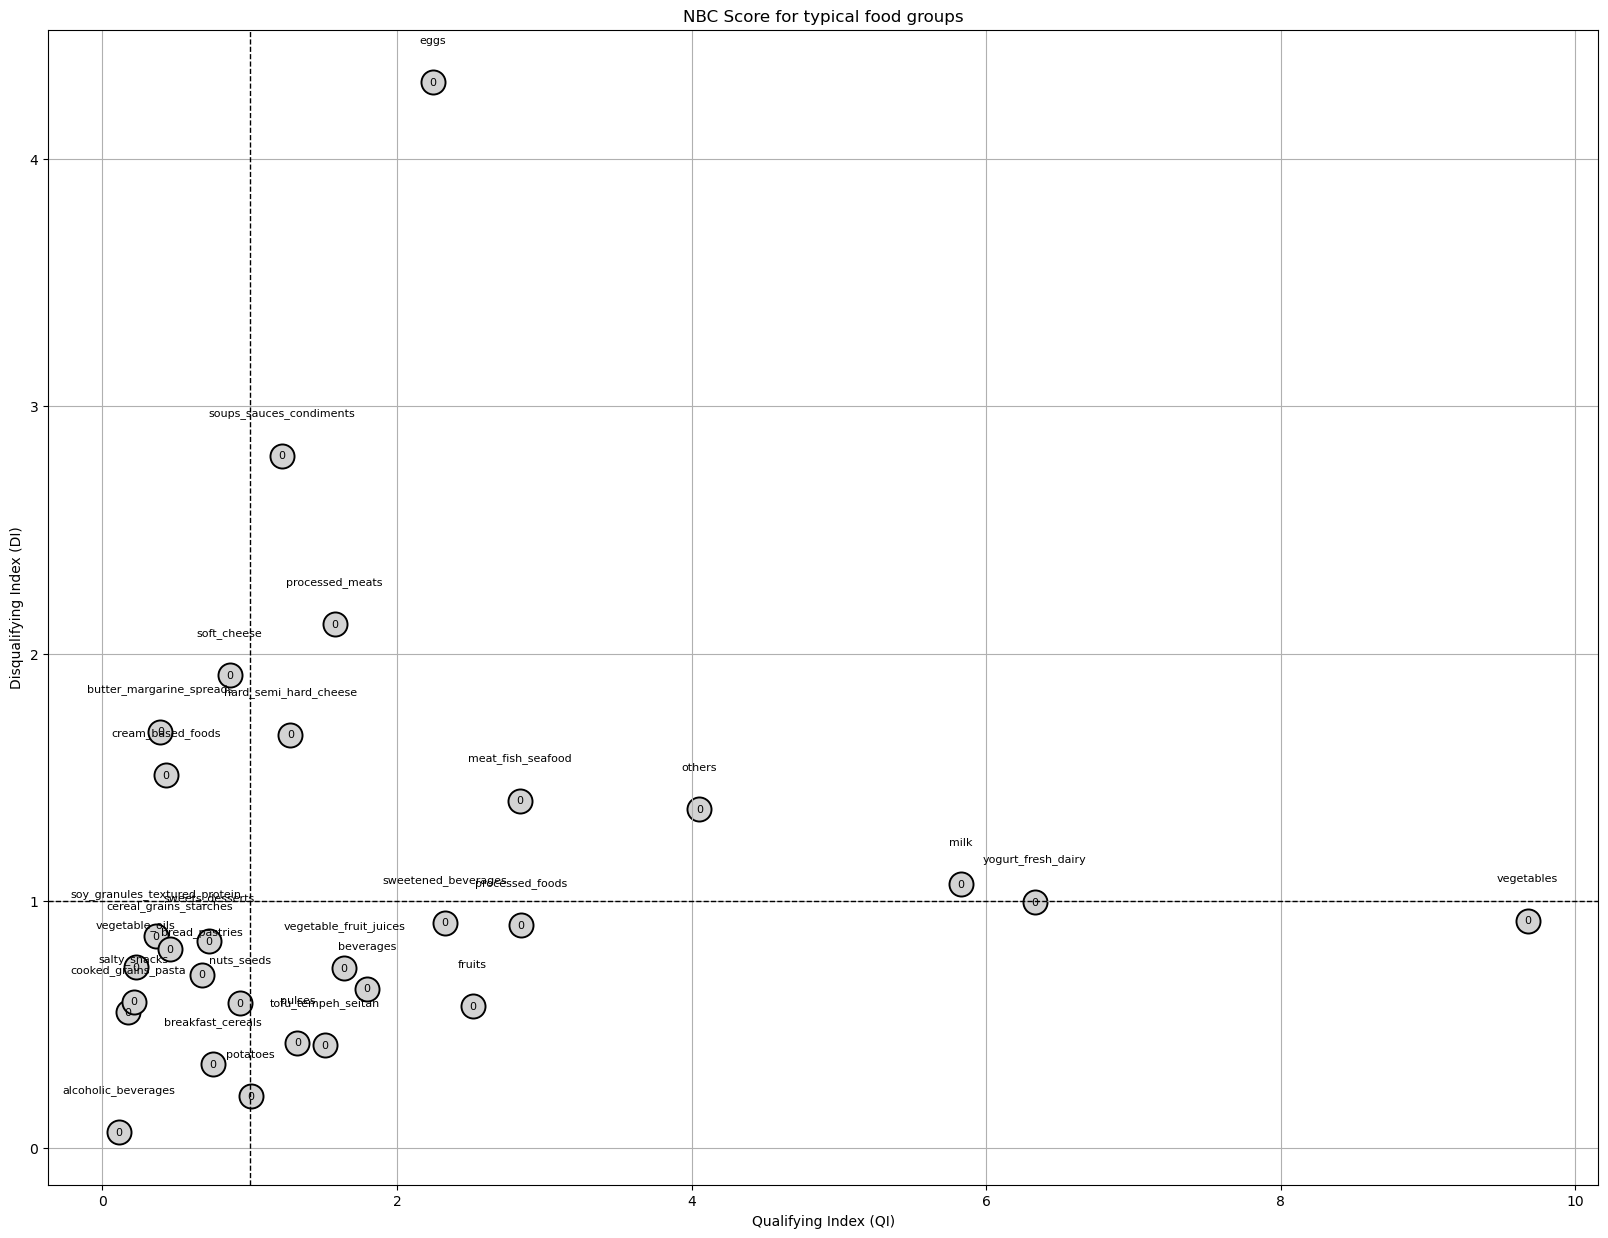

In [422]:
plt.figure(figsize=(20, 15))

data = df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').mean(numeric_only=True).sort_values('QI')

ax = sns.scatterplot(data=data, x='QI',y='DI',s=300,color='lightgray',edgecolor='black')

for i, row in data.iterrows():

    x = row['QI']
    y = row['DI']
    nb_values = row['NB']

    plt.text(x, y, f"{int(nb_values)}", ha='center', va='center', fontsize=8)

    plt.text(x, y + 0.15, i ,ha='center', va='bottom',fontsize=8, color='black')


plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title('NBC Score for typical food groups')
plt.grid()
plt.show()


# Classification of food into meals

In [320]:
df_food_scaled.groupby(["subject_key", "eaten_at"])["combined_name"].value_counts()

subject_key   eaten_at             combined_name                                  
02ae3856ca04  2018-11-26 07:20:04  Coffee, with caffeine                              1
              2018-11-26 07:47:34  Corn Flakes                                        1
                                   Honey n.s.                                         1
                                   Yaourt, yahourt, yogourt ou yoghourt, natural      1
              2018-11-26 08:56:24  Banana                                             1
                                                                                     ..
zznk4w        2022-09-25 06:11:19  Tomato, raw                                        1
              2022-09-25 09:19:35  Coffee, with caffeine                              1
                                   Oat milk                                           1
              2022-09-25 10:24:40  Porridge, prepared, with partially skimmed milk    1
              2022-09-25 10:36:35  Ca

In [321]:
def classify_meal_time(eaten_at):
    hour = eaten_at.hour

    if 5 <= hour < 11 :
        return 'breakfast'
    elif 11 <= hour < 16 :
        return 'lunch'
    else :
        return 'dinner'

In [322]:
df_food_scaled['eaten_at'] = pd.to_datetime(df_food_scaled['eaten_at'])
df_food_scaled['date'] = pd.to_datetime(df_food_scaled['eaten_at']).dt.date
df_food_scaled['meal'] = df_food_scaled['eaten_at'].apply(classify_meal_time)
df_food_scaled

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB,date,meal
0,13,0,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,22.818792,1181.208054,0.000000,1033.557047,0.000000,2.498497,1.029937,67.110660,2022-02-15,dinner
3,13,0,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,22.818792,1181.208054,0.000000,1033.557047,0.000000,2.498497,1.029937,67.110660,2023-01-18,lunch
4,25,0,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,1.047794,0.613055,61.770389,2021-03-30,lunch
5,25,0,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,1.047794,0.613055,61.770389,2021-10-21,breakfast
6,25,0,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,1.047794,0.613055,61.770389,2021-09-19,breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,5.804749,0.000000,79.155673,0.000000,0.158311,0.090215,0.187741,9.021452,2023-03-13,lunch
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,5.804749,0.000000,79.155673,0.000000,0.158311,0.090215,0.187741,9.021452,2023-03-13,lunch
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,8.219178,0.000000,257.534247,0.000000,5.753425,0.952744,0.682545,30.000000,2023-02-25,breakfast
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000,0.000000,363.636364,0.000000,90.909091,0.786561,3.010101,10.000000,2023-03-06,dinner


In [323]:
df_food_scaled.groupby(['subject_key', 'meal','energy_kcal_eaten', 'date', 'QI', 'DI', 'NB'])['combined_name'].value_counts()

subject_key   meal       energy_kcal_eaten  date        QI        DI        NB         combined_name                     
02ae3856ca04  breakfast  2.00               2018-11-26  2.115202  0.090278  35.000000  Coffee, with caffeine                 1
                                            2018-11-29  2.115202  0.090278  35.000000  Coffee, with caffeine                 1
                                            2018-12-03  2.115202  0.090278  35.000000  Coffee, with caffeine                 1
                                            2018-12-05  2.115202  0.090278  35.000000  Coffee, with caffeine                 1
                                            2018-12-06  2.115202  0.090278  35.000000  Coffee, with caffeine                 1
                                                                                                                            ..
zznk4w        lunch      218.00             2022-09-15  0.033307  1.271872  3.330674   Coop Karma - Organic Korma (s

In [324]:


def weighted_mean(values, weights):
    if weights.sum() != 0:
        return (values * weights).sum() / weights.sum()
    else:
        return np.nan

def aggregate_meal(group):

    total_energy = group['energy_kcal_eaten'].sum()
    qi = weighted_mean(group['QI'], group['energy_kcal_eaten'])
    di = weighted_mean(group['DI'], group['energy_kcal_eaten'])
    nb = weighted_mean(group['NB'], group['energy_kcal_eaten'])

    return pd.Series({
        'total_energy': total_energy,
        'QI': qi,
        'DI': di,
        'NB': nb
    })



In [325]:
meal_summary_weighted = df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index()

C:\Users\Sophie\AppData\Local\Temp\ipykernel_4164\332498296.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meal_summary_weighted = df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index()


In [326]:
meal_summary_weighted

,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-11-26,breakfast,1345.70,0.400501,0.762762,23.466596
1,02ae3856ca04,2018-11-26,dinner,1597.20,0.782443,0.766171,34.557540
2,02ae3856ca04,2018-11-26,lunch,406.20,0.830997,1.376525,31.378706
3,02ae3856ca04,2018-11-27,breakfast,505.70,0.845793,0.725534,51.462365
4,02ae3856ca04,2018-11-27,dinner,1967.02,0.450769,0.860297,23.546294
...,...,...,...,...,...,...,...
43151,zznk4w,2022-09-23,lunch,515.80,0.551791,0.754184,37.475434
43152,zznk4w,2022-09-24,breakfast,1510.47,0.545286,1.022820,27.308354
43153,zznk4w,2022-09-24,dinner,1707.16,2.781361,0.977415,33.177662
43154,zznk4w,2022-09-24,lunch,795.25,0.212611,0.752383,17.993521


In [327]:
summary_by_meal = meal_summary_weighted.groupby('meal')[['QI', 'DI', 'NB', 'total_energy']].mean().reset_index()
summary_by_meal

,meal,QI,DI,NB,total_energy
0,breakfast,1.400257,0.920470,34.281900,695.542077
1,dinner,1.565124,0.974608,35.895846,977.147605
2,lunch,1.759542,0.923422,35.224902,648.465867


In [328]:
daily_total_energy = meal_summary_weighted.groupby(['subject_key', 'date'])['total_energy'].sum().reset_index().sort_values('total_energy',ascending=True)
daily_total_energy


,subject_key,date,total_energy
13983,y5yetf,2020-08-14,500.2600
7701,jyqd2j,2019-05-25,500.5000
14252,yqayaj,2021-07-16,506.0000
7975,kgznn6,2020-10-17,507.0300
5094,dstrxw,2022-07-23,508.5500
...,...,...,...
14567,z8q7px,2019-12-21,6091.3500
7851,kbrb52,2022-02-05,6106.9300
9999,q8ex6k,2021-04-04,6248.6900
13542,xcmwrd,2020-06-27,6397.2400


In [329]:
print('Average total energy for a day :', daily_total_energy['total_energy'].mean())

Average total energy for a day : 2234.152824808795


### Largest meal in kcal (breakfast, lunch, dinner)

In [330]:
largest_breakfast = (
    meal_summary_weighted[meal_summary_weighted['meal'] == 'breakfast']
    .sort_values('total_energy')
    .groupby('subject_key')
    .last()  # or use .idxmax() on total_energy
    .reset_index()
)
largest_breakfast


,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-11-26,breakfast,1345.70,0.400501,0.762762,23.466596
1,223h73,2019-08-21,breakfast,1669.40,0.643571,0.941804,34.538225
2,22w6cq,2020-01-30,breakfast,585.90,0.505112,1.161652,33.567896
3,244bwh,2020-09-11,breakfast,1403.50,0.976845,1.002902,50.994734
4,2857fm,2019-10-06,breakfast,1748.50,0.722248,1.260332,25.963358
...,...,...,...,...,...,...,...
1004,zwsy9r,2020-07-24,breakfast,1119.30,0.929305,1.335229,44.776052
1005,zxq62h,2022-07-19,breakfast,1757.22,1.067253,0.233251,24.395173
1006,zy5e65,2022-01-18,breakfast,1341.00,0.802080,0.503752,37.725522
1007,zyt7da,2020-03-24,breakfast,1269.61,0.840542,0.906130,22.256330


In [331]:
largest_lunch = (
    meal_summary_weighted[meal_summary_weighted['meal'] == 'lunch']
    .sort_values('total_energy')
    .groupby('subject_key')
    .last()  # or use .idxmax() on total_energy
    .reset_index()
)
largest_lunch

,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-11-28,lunch,1750.15000,0.915021,1.500759,53.069913
1,223h73,2019-09-02,lunch,1826.25000,0.215169,0.613271,10.691452
2,22w6cq,2020-01-26,lunch,1311.64752,0.134938,0.178179,12.047304
3,244bwh,2020-09-01,lunch,1131.58000,0.984439,0.978043,46.382105
4,2857fm,2019-10-07,lunch,2107.85000,0.562727,0.839335,41.081639
...,...,...,...,...,...,...,...
1002,zwsy9r,2020-07-21,lunch,1833.50000,1.622141,1.456679,51.436138
1003,zxq62h,2022-07-30,lunch,1067.35000,0.527828,0.895028,24.269058
1004,zy5e65,2022-02-02,lunch,1116.00000,1.223161,0.880879,63.707507
1005,zyt7da,2020-02-28,lunch,1812.27000,2.619335,1.443958,43.903894


In [332]:
largest_dinner = (
    meal_summary_weighted[meal_summary_weighted['meal'] == 'dinner']
    .sort_values('total_energy')
    .groupby('subject_key')
    .last()  # or use .idxmax() on total_energy
    .reset_index()
)
largest_dinner

,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-12-07,dinner,3459.57000,4.076218,0.945345,40.173237
1,223h73,2019-09-01,dinner,2414.12000,0.737336,0.808709,44.295423
2,22w6cq,2020-02-04,dinner,1742.67800,0.615742,0.802625,29.140608
3,244bwh,2020-09-06,dinner,1238.76000,0.632221,1.257737,22.311570
4,2857fm,2019-10-04,dinner,4005.50871,1.832386,0.790696,22.198135
...,...,...,...,...,...,...,...
1004,zwsy9r,2020-07-24,dinner,1120.10000,1.204900,1.396255,35.679912
1005,zxq62h,2022-07-23,dinner,1447.39000,0.366976,0.940111,17.991534
1006,zy5e65,2022-02-02,dinner,1558.41000,1.009673,1.278149,21.007215
1007,zyt7da,2020-03-14,dinner,2738.13000,4.061763,1.294017,33.618285


In [333]:
largest_meals = pd.concat([largest_breakfast, largest_lunch, largest_dinner])

# Now group by 'meal' to get average QI, DI, and NB for each meal type
summary_by_high_meal = largest_meals.groupby('meal')[['QI', 'DI', 'NB', 'total_energy']].mean().reset_index()
summary_by_high_meal


,meal,QI,DI,NB,total_energy
0,breakfast,1.229606,0.974347,33.432101,1370.391174
1,dinner,1.313872,0.899487,33.079565,1860.062892
2,lunch,1.463249,0.924721,34.635669,1417.655559


In [334]:
subject = 'bryt9h'
target_date = pd.to_datetime('2019-06-17').date()
meal_type = 'breakfast'

df_subject_meal = df_food_scaled[
    (df_food_scaled['subject_key'] == subject) &
    (df_food_scaled['date'] == target_date) &
    (df_food_scaled['meal'] == meal_type)
]


In [335]:
df_subject_meal[['energy_kcal_eaten','eaten_at', 'combined_name', 'QI', 'DI', 'NB']]


,energy_kcal_eaten,eaten_at,combined_name,QI,DI,NB
162006,136.00,2019-06-17 10:23:58,"Bread, grain",0.169437,0.429793,10.000000
448256,103.65,2019-06-17 05:56:28,"Greek Yaourt, yahourt, yogourt ou yoghourt",75.223594,1.070352,61.913073
474625,212.50,2019-06-17 10:23:32,MClassic - Saladbowl Chicken,254.631479,1.645896,85.009150


In [336]:
df_food[df_food['combined_name'] == 'Coca-Cola Energy'][['energy_kcal_eaten','niacin_eaten','pantothenic_acid_eaten', 'vitamin_b12_eaten', 'vitamin_b6_eaten']]

,energy_kcal_eaten,niacin_eaten,pantothenic_acid_eaten,vitamin_b12_eaten,vitamin_b6_eaten
489432,1.75,0.004,0.005,0.000005,0.000375
489433,1.75,0.004,0.005,0.000005,0.000375


In [337]:
#df_food_scaled[df_food_scaled['combined_name'] == 'Coca-Cola Energy'][['energy_kcal_eaten','niacin_eaten_scaled','pantothenic_acid_eaten_scaled', 'vitamin_b12_eaten_scaled', 'vitamin_b6_eaten_scaled']]

In [338]:
qi_ratios[qi_ratios['combined_name'] == 'MClassic - Saladbowl Chicken'].T

,474624,474625
folate_eaten_ratio,1.723529,1.723529
niacin_eaten_ratio,3.848739,3.848739
pantothenic_acid_eaten_ratio,2.211765,2.211765
vitamin_b2_eaten_ratio,1454.545455,1454.545455
vitamin_b1_eaten_ratio,1882.352941,1882.352941
all_trans_retinol_equivalents_activity_eaten_ratio,0.0,0.0
beta_carotene_eaten_ratio,21.07563,21.07563
vitamin_b12_eaten_ratio,4.705882,4.705882
vitamin_b6_eaten_ratio,1701.357466,1701.357466
vitamin_c_eaten_ratio,0.348235,0.348235


In [339]:
qi_ratios[qi_ratios['combined_name'] == 'Red Bull Zero Calories'].T

,513972,513973,513974,513975,513976,513977,513978,513979,513980,513981,513982,513983,513984,513985,513986,513987,513988
folate_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
niacin_eaten_ratio,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635,634.920635
pantothenic_acid_eaten_ratio,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444,444.444444
vitamin_b2_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vitamin_b1_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_trans_retinol_equivalents_activity_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_carotene_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vitamin_b12_eaten_ratio,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926,925.925926
vitamin_b6_eaten_ratio,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709,1709.401709
vitamin_c_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


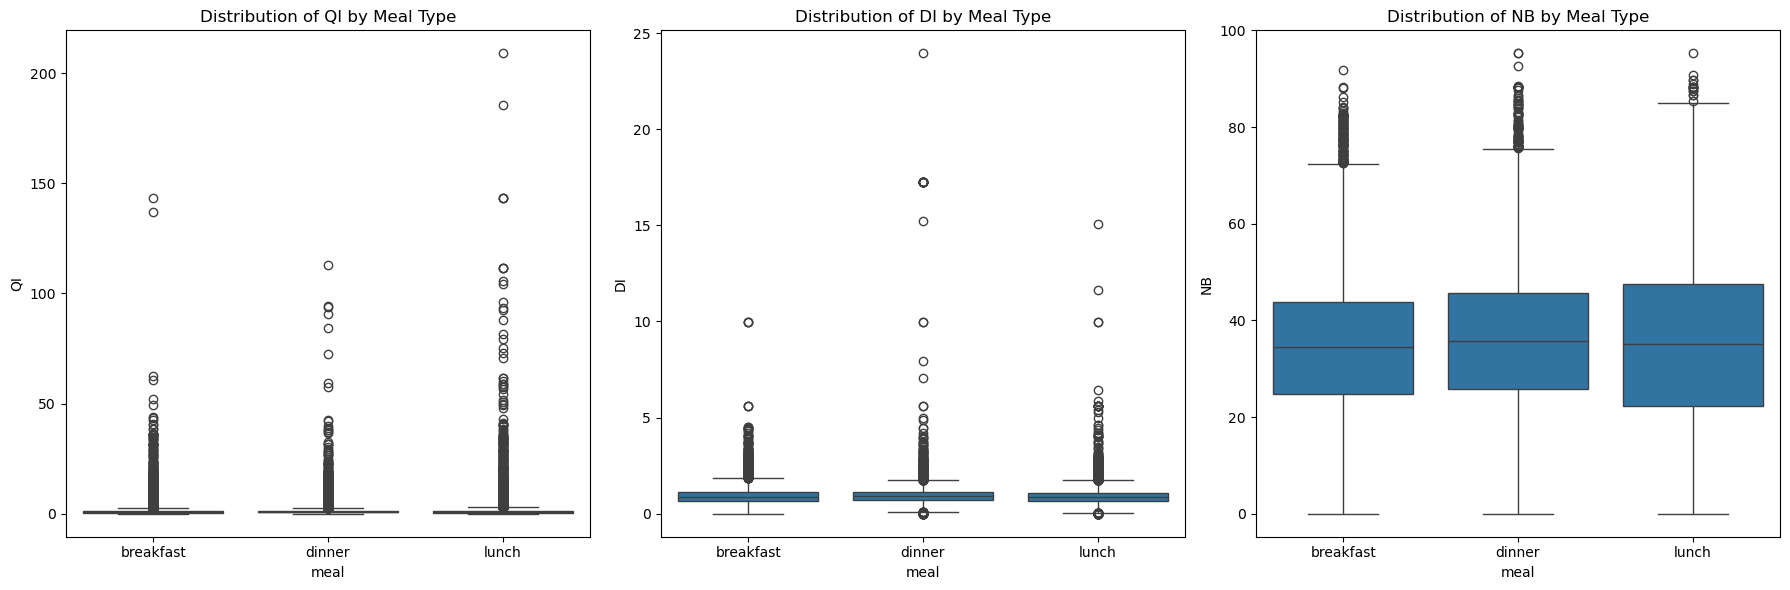

In [340]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6), sharey=False)


sns.boxplot(x='meal', y='QI', data=meal_summary_weighted, ax=axes[0])
axes[0].set_title('Distribution of QI by Meal Type')

sns.boxplot(x='meal', y='DI', data=meal_summary_weighted, ax=axes[1])
axes[1].set_title('Distribution of DI by Meal Type')

sns.boxplot(x='meal', y='NB', data=meal_summary_weighted, ax=axes[2])
axes[2].set_title('Distribution of NB by Meal Type')

plt.tight_layout()
plt.show()

In [341]:
meal_summary_weighted.sort_values('QI', ascending=False).head(30)

,subject_key,date,meal,total_energy,QI,DI,NB
28108,pvyupm,2020-06-19,lunch,1.750,209.000523,15.079365,20.000000
2133,3zke2w,2022-09-23,lunch,4.500,185.734636,1.851852,20.000000
11059,ayshv2,2019-03-01,lunch,400.150,143.393908,1.126360,80.829971
40144,xzss4y,2019-07-17,lunch,362.400,143.393908,1.126360,80.829971
40140,xzss4y,2019-07-16,breakfast,453.000,143.393908,1.126360,80.829971
1422,36gqfj,2019-03-19,lunch,226.500,143.393908,1.126360,80.829971
12259,bryt9h,2019-06-17,breakfast,452.150,136.965959,1.148174,57.153012
490,2kw79f,2022-04-28,dinner,576.600,112.998003,1.033440,73.445589
27592,pcge6n,2021-09-02,lunch,7.500,111.440781,1.856481,20.000000
30401,rb8bwp,2022-06-16,lunch,7.500,111.440781,1.856481,20.000000


In [342]:
qi_ratios[['combined_name', 'QI']].drop_duplicates('combined_name').sort_values('QI', ascending=False).head(30)

,combined_name,QI
465812,Bourquin Nutrition - Spirulina BIO,608.951325
474624,MClassic - Saladbowl Chicken,254.631479
489432,Coca-Cola Energy,209.000523
513972,Red Bull Zero Calories,185.734636
456485,OK zero,167.161172
502121,Denner - E-Zero,167.161172
495567,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394
488821,Monster Energy - Ultra citron,155.209707
479582,ANDROS FRUIT ME UP! Apple Mango,149.719034
475709,Betty Bossi - Chicken Caesar Salad (& caesar d...,147.293505



- Coca-Cola Energy
- Red Bull Zero Calories
- Chicken caesar salad (green salad, cheese, croutons, sauce)

-------------------------------------------------------

- niacin_eaten_ratio
- pantothenic_acid_eaten_ratio
- vitamin_b12_eaten_ratio
- vitamin_b6_eaten_ratio
- vitamin_b1_eaten_ratio
- vitamin_b2_eaten_ratio


In [343]:
df_food_scaled.groupby(['subject_key', 'meal', 'date',])["combined_name"].value_counts()

subject_key   meal       date        combined_name          
02ae3856ca04  breakfast  2018-11-26  Bread, alpine              3
                                     Balsamic salad dressing    1
                                     Banana                     1
                                     Coffee, with caffeine      1
                                     Corn Flakes                1
                                                               ..
zznk4w        lunch      2022-09-23  Mixed nuts                 1
                                     Paprika chips              1
                         2022-09-24  Banana cake                2
                                     Chocolate Chips/Leaves     2
                                     Cake, chocolate            1
Name: count, Length: 280106, dtype: int64

In [344]:
df_food_scaled[df_food_scaled['subject_key'] == '02ae3856ca04']

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB,date,meal
10506,732,0,946,420.0,g,02ae3856ca04,2018-11-28 11:06:07,60,1,unclassified,...,81.578947,960.526316,7.894737,2434.210526,0.000000,1.112285,1.640484,59.909995,2018-11-28,lunch
10724,733,0,1480,70.0,g,02ae3856ca04,2018-12-06 13:47:03,60,1,unclassified,...,61.538462,532.544379,17.751479,5443.786982,0.000000,3.294457,1.419167,95.260637,2018-12-06,lunch
15110,1009,0,897,200.0,g,02ae3856ca04,2018-11-27 11:41:18,60,1,grains_potatoes_pulses,...,6.493506,0.000000,10.389610,6493.506494,0.000000,0.126200,0.527859,8.529080,2018-11-27,lunch
15372,1010,0,1227,180.0,g,02ae3856ca04,2018-12-02 19:06:39,60,1,grains_potatoes_pulses,...,0.000000,0.000000,18.181818,72.727273,0.000000,1.365492,0.034843,69.079880,2018-12-02,dinner
20246,1022,0,826,90.0,g,02ae3856ca04,2018-11-26 10:37:26,60,1,vegetables_fruits,...,0.000000,0.000000,0.000000,0.000000,7.878788,0.583663,0.283605,10.000000,2018-11-26,breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469855,5641,0,1221,180.0,g,02ae3856ca04,2018-12-02 17:04:21,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,2018-12-02,dinner
469856,5641,0,1375,180.0,g,02ae3856ca04,2018-12-05 09:17:17,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,2018-12-05,breakfast
469857,5641,0,1457,150.0,g,02ae3856ca04,2018-12-06 07:20:27,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,2018-12-06,breakfast
469858,5641,0,1544,150.0,g,02ae3856ca04,2018-12-07 08:11:47,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,2018-12-07,breakfast


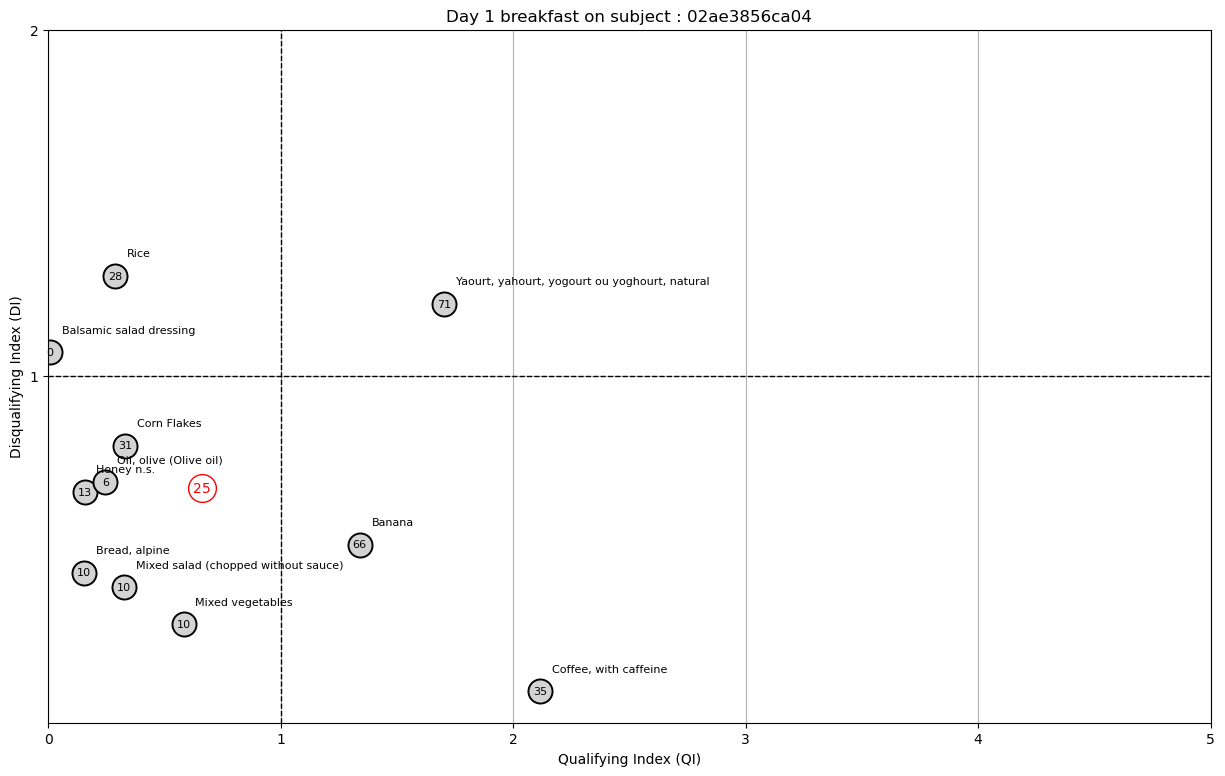

25.78992264037953


In [345]:
subject_id = '02ae3856ca04'
target_date = pd.to_datetime('2018-11-26').date()
meal_name = 'breakfast'



df_breakfast = df_food_scaled[(df_food_scaled['subject_key'] == subject_id) & (df_food_scaled['date'] == target_date) & (df_food_scaled['meal'] == meal_name)].copy()
df_breakfast = df_breakfast[['combined_name', 'QI', 'DI', 'NB', 'eaten_at']].drop_duplicates('combined_name')
df_breakfast = df_breakfast.sort_values('eaten_at')

combined_qi = df_breakfast['QI'].mean()
combined_di = df_breakfast['DI'].mean()
combined_nb = df_breakfast['NB'].mean()

plt.figure(figsize=(15,9))

ax = sns.scatterplot(data=df_breakfast, x='QI',y='DI',s=300,color='lightgray',edgecolor='black')

for i, row in df_breakfast.iterrows():
    
    x = row['QI']
    y = row['DI']
    nb_values = row['NB']


    plt.text(x, y, f"{int(nb_values)}", ha='center', va='center', fontsize=8)

    plt.text(x + 0.05, y + 0.05, row['combined_name'],ha='left', va='bottom', fontsize=8, color='black')



 
plt.scatter(combined_qi, combined_di, s=400, color='white', edgecolors='red', zorder=3)

plt.text(combined_qi, combined_di, str(int(combined_nb)),ha='center', va='center', color='red', fontsize=10)


plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

plt.xlim(0, 5)
plt.ylim(0, 2)
plt.yticks([1,2])

plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title(f'Day 1 {meal_name} on subject : {subject_id}')
plt.grid()
plt.show()

print(combined_nb)


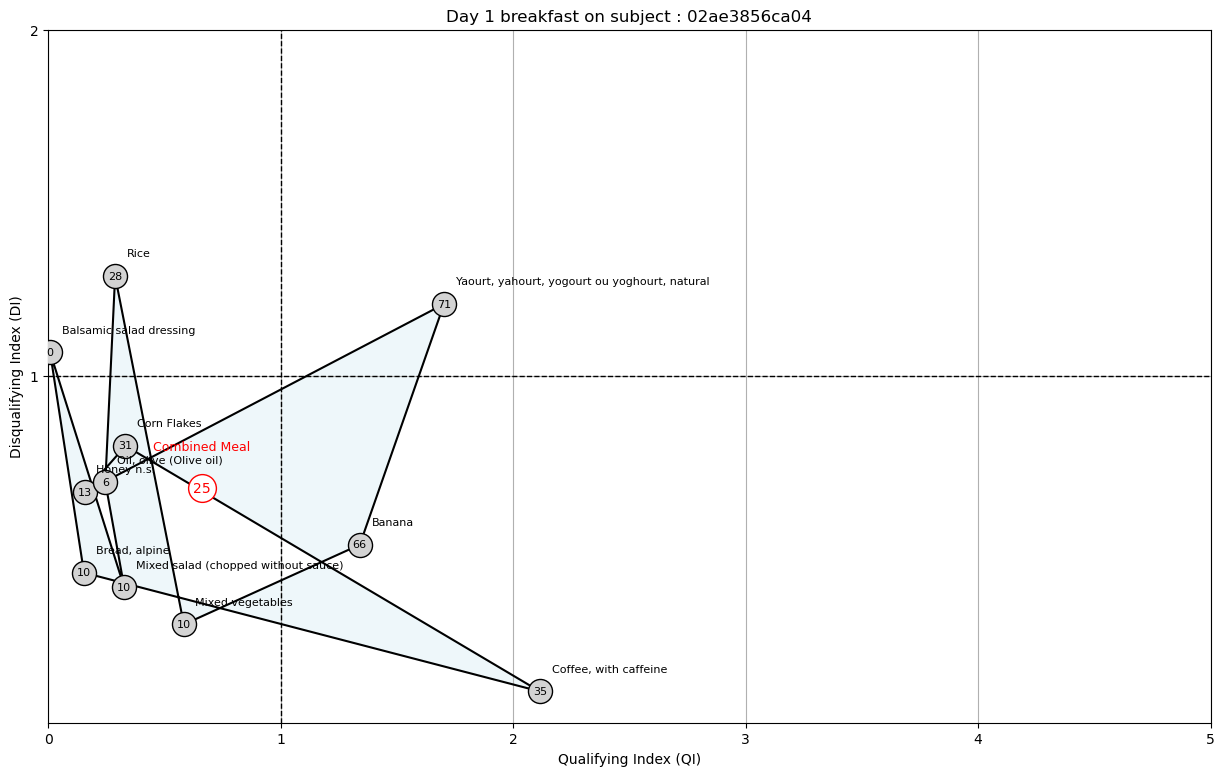

Combined NB: 25.78992264037953


In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

subject_id = '02ae3856ca04'
target_date = pd.to_datetime('2018-11-26').date()
meal_name = 'breakfast'

# 1. Filter
df_breakfast = df_food_scaled[
    (df_food_scaled['subject_key'] == subject_id) &
    (df_food_scaled['date'] == target_date) &
    (df_food_scaled['meal'] == meal_name)
].copy()

# 2. Include 'eaten_at' so we can sort in consumption order
df_breakfast = df_breakfast[['combined_name', 'QI', 'DI', 'NB', 'eaten_at']].drop_duplicates('combined_name')

# If you don't have 'eaten_at', remove the .sort_values(...) line and skip the polygon approach

# 3. Sort by time (consumption order)
df_breakfast = df_breakfast.sort_values('eaten_at')

# 4. Compute combined meal
combined_qi = df_breakfast['QI'].mean()
combined_di = df_breakfast['DI'].mean()
combined_nb = df_breakfast['NB'].mean()

# 5. Prepare the polygon coordinates
x_coords = df_breakfast['QI'].tolist()
y_coords = df_breakfast['DI'].tolist()

# 6. Close the polygon by repeating the first point at the end
if len(x_coords) > 1:
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

plt.figure(figsize=(15, 9))

# 7. Fill the polygon (lightblue) and connect the points in black
#    Only if you have more than 2 items to form a polygon
if len(x_coords) > 2:
    plt.fill(x_coords, y_coords, alpha=0.2, color='lightblue', zorder=1)
    plt.plot(x_coords, y_coords, color='black', linestyle='-', zorder=2)

# 8. Plot each item as a circle
#    We'll do this manually instead of sns.scatterplot so we can control the polygon layering
for idx in range(len(df_breakfast)):
    row = df_breakfast.iloc[idx]
    x = row['QI']
    y = row['DI']
    nb_val = int(row['NB'])
    
    # Circle
    plt.scatter(x, y, s=300, color='lightgray', edgecolor='black', zorder=3)
    
    # NB in center
    plt.text(x, y, f"{nb_val}", ha='center', va='center', fontsize=8, color='black', zorder=4)
    
    # Food name offset
    plt.text(x + 0.05, y + 0.05, row['combined_name'], 
             ha='left', va='bottom', fontsize=8, color='black', zorder=4)

# 9. Plot the combined meal point (large circle with red outline)
plt.scatter(combined_qi, combined_di, s=400, color='white', edgecolors='red', zorder=5)
plt.text(combined_qi, combined_di, str(int(combined_nb)), 
         ha='center', va='center', color='red', fontsize=10, zorder=6)
plt.text(combined_qi, combined_di + 0.1, 'Combined Meal', 
         ha='center', va='bottom', color='red', fontsize=9, zorder=6)

# 10. Dashed lines at QI=1 and DI=1
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# 11. Set x-axis and y-axis limits
plt.xlim(0, 5)
plt.ylim(0, 2)

# 12. Show only ticks at y=1 and y=2
plt.yticks([1, 2])

plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title(f'Day 1 {meal_name} on subject : {subject_id}')
plt.grid()
plt.show()

print("Combined NB:", combined_nb)


# Statistical Tests

In [347]:

def significance_test(data, group_col, value_col, alpha=0.05, non_parametric=False):
    groups = data[group_col].unique()
    if len(groups) == 2:
        group1 = data[data[group_col] == groups[0]][value_col]
        group2 = data[data[group_col] == groups[1]][value_col]
        if non_parametric:
            stat, p_val = mannwhitneyu(group1, group2)
            test_name = "Mann-Whitney U"
        else:
            stat, p_val = ttest_ind(group1, group2)
            test_name = "t-test"
        return p_val < alpha, p_val, test_name, stat
    elif len(groups) > 2:
        group_values = [data[data[group_col] == grp][value_col] for grp in groups]
        if non_parametric:
            stat, p_val = kruskal(*group_values)
            test_name = "Kruskal-Wallis"
        else:
            stat, p_val = f_oneway(*group_values)
            test_name = "ANOVA"
        return p_val < alpha, p_val, test_name, stat
    return False, 1.0, "No test", 0
def create_quartiles(df, column_name, ncut=4):
    """Add quartile categories (1-4) for a specified column in a DataFrame."""
    df_copy = df.copy()
    df_copy[column_name + "_quartile"] = pd.qcut(
        df_copy[column_name], q=ncut, labels=[f"Q{i}" for i in range(1, ncut + 1)]
    )
    return df_copy
def add_stat_annotation(ax, data, x, y, pairs, test="Mann-Whitney", text_format="star"):
    """Add statistical annotation bars to the plot."""
    annotator = Annotator(ax, pairs, data=data, x=x, y=y)
    annotator.configure(
        test=test,
        text_format=text_format,
        line_width=0.5,  # Thinner lines
        line_height=0.02,
    )  # Slightly shorter bars
    annotator.apply_and_annotate()
def test_quartile_differences(
    df,
    column_name,
    value_col,
    extremes=True,
    alpha=0.05,
    non_parametric=True,
    ax=None,
    palette="Spectral",
    make_quartile=True,
    verbose=False,
):
    """
    Test differences between quartiles of a specified column and create a boxplot with significance bars.
    """
    df = df.copy()
    if make_quartile:
        df = create_quartiles(df, column_name)
        quartile_col = column_name + "_quartile"
    else:
        quartile_col = column_name
    if extremes:
        df = df[df[quartile_col].isin(["Q1", "Q4"])]
        if isinstance(df[quartile_col].dtype, pd.CategoricalDtype):
            df[quartile_col] = df[quartile_col].cat.remove_unused_categories()
    # Create plot if ax not provided
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    # Create boxplot
    sns.boxplot(
        data=df,
        x=quartile_col,
        y=value_col,
        ax=ax,
        linewidth=0.5,
        fliersize=1,
        width=0.5,
        palette=palette,
    )
    # Get unique groups and create pairs for comparison
    groups = sorted(df[quartile_col].dropna().astype(str).unique())
    if extremes:
        # If only comparing extremes, just compare Q1 and Q4
        pairs = [("Q1", "Q4")]
    else:
        # Create all possible pairs of quartiles
        pairs = list(combinations(groups, 2))
    # Determine statistical test
    test = "Mann-Whitney" if non_parametric else "t-test"
    # Add statistical annotation
    add_stat_annotation(ax, df, x=quartile_col, y=value_col, pairs=pairs, test=test)
    # Run the original significance test for console output
    is_sig, p_val, test_name, stat = significance_test(
        df, quartile_col, value_col, alpha=alpha, non_parametric=non_parametric
    )
    if verbose:
        if is_sig:
            print(
                f"{column_name} -> {value_col}\tSignificant differences exist.",
                f"{test_name} statistic: {stat:.3f} p-value: {p_val:.3f}",
            )
        else:
            print(f"{column_name} -> {value_col}\tNo significant differences.")
    # Add test statistics to plot
    ylims = ax.get_ylim()
    yrange = ylims[1] - ylims[0]
    text_y = ylims[1] + yrange * 0.05  # Position text above the plot
    # Format test information with abbreviated names
    test_abbrev = {
        "Kruskal-Wallis": "KW",
        "Mann-Whitney U": "MW",
        "ANOVA": "ANOVA",
        "t-test": "t-test",
    }
    abbreviated_name = test_abbrev.get(test_name, test_name)
    if test_name == "Kruskal-Wallis":
        test_info = f"${abbreviated_name}:$ $H={stat:.2f}$, $p={p_val:.3f}$"
    elif test_name == "Mann-Whitney U":
        test_info = f"${abbreviated_name}:$ $U={stat:.2f}$, $p={p_val:.3f}$"
    else:
        test_info = f"${abbreviated_name}:$ $t={stat:.2f}$, $p={p_val:.3f}$"
    # Add text with test information
    ax.text(
        0,
        text_y,
        test_info,
        horizontalalignment="left",
        verticalalignment="bottom",
        fontsize=8,
    )
    # Adjust plot limits to accommodate the text
    ax.set_ylim(ylims[0], ylims[1] + yrange * 0.15)
    return ax


In [348]:
largest_meals.columns

Index(['subject_key', 'date', 'meal', 'total_energy', 'QI', 'DI', 'NB'], dtype='object')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

breakfast vs. lunch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.370e-02 U_stat=4.803e+05
lunch vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:5.855e-03 U_stat=5.440e+05
breakfast vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:4.991e-01 U_stat=5.179e+05


C:\Users\Sophie\AppData\Local\Temp\ipykernel_4164\363652421.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='meal', ylabel='NB'>

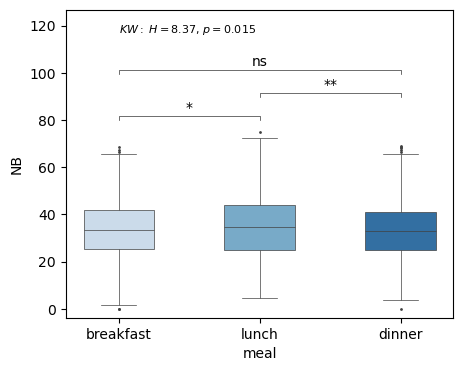

In [349]:
fig, ax = plt.subplots(1, 1, figsize=(5,4)) #Gauthier : figsize=(5,4) before 
test_quartile_differences(
    largest_meals, # your dataframe
    'meal', # grouping column (e.g good or bad food group)
    'NB', # target column e.g NB or QI or DI
    extremes=False,
    make_quartile=False,
    palette="Blues",
    verbose=False,
    ax=ax,
)

C:\Users\Sophie\AppData\Local\Temp\ipykernel_4164\363652421.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

breakfast vs. lunch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.373e-04 U_stat=4.600e+05
lunch vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:1.618e-01 U_stat=5.263e+05
breakfast vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:1.345e-02 U_stat=4.767e+05


<Axes: xlabel='meal', ylabel='QI'>

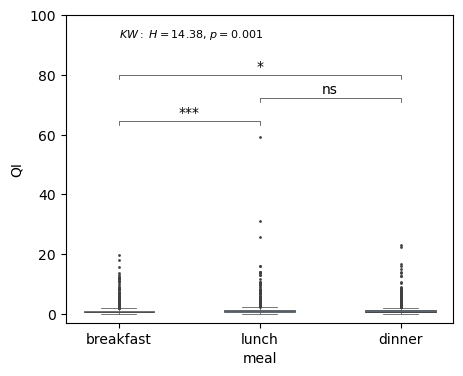

In [350]:
fig, ax = plt.subplots(1, 1, figsize=(5,4)) #Gauthier : figsize=(5,4) before 
test_quartile_differences(
    largest_meals, # your dataframe
    'meal', # grouping column (e.g good or bad food group)
    'QI', # target column e.g NB or QI or DI
    extremes=False,
    make_quartile=False,
    palette="Blues",
    verbose=False,
    ax=ax,
)

C:\Users\Sophie\AppData\Local\Temp\ipykernel_4164\363652421.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

breakfast vs. lunch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.774e-04 U_stat=5.570e+05
lunch vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:8.124e-02 U_stat=5.308e+05
breakfast vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:6.940e-08 U_stat=5.796e+05


<Axes: xlabel='meal', ylabel='DI'>

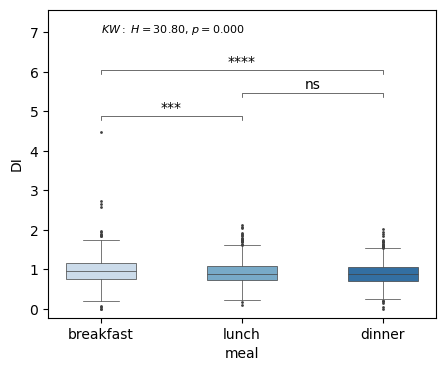

In [351]:
fig, ax = plt.subplots(1, 1, figsize=(5,4)) #Gauthier : figsize=(5,4) before 
test_quartile_differences(
    largest_meals, # your dataframe
    'meal', # grouping column (e.g good or bad food group)
    'DI', # target column e.g NB or QI or DI
    extremes=False,
    make_quartile=False,
    palette="Blues",
    verbose=False,
    ax=ax,
)

In [352]:
qi_ratios.columns

Index(['folate_eaten_ratio', 'niacin_eaten_ratio',
       'pantothenic_acid_eaten_ratio', 'vitamin_b2_eaten_ratio',
       'vitamin_b1_eaten_ratio',
       'all_trans_retinol_equivalents_activity_eaten_ratio',
       'beta_carotene_eaten_ratio', 'vitamin_b12_eaten_ratio',
       'vitamin_b6_eaten_ratio', 'vitamin_c_eaten_ratio',
       'vitamin_d_eaten_ratio', 'vitamin_e_activity_eaten_ratio',
       'calcium_eaten_ratio', 'iron_eaten_ratio', 'magnesium_eaten_ratio',
       'phosphorus_eaten_ratio', 'potassium_eaten_ratio', 'zinc_eaten_ratio',
       'fiber_eaten_ratio', 'protein_eaten_ratio', 'QI', 'combined_name',
       'food_group', 'energy_kcal_eaten', 'eaten_quantity_in_gram'],
      dtype='object')

In [402]:
qi_ratios[qi_ratios['food_group'] == 'vegetables'].describe().T

,count,mean,std,min,25%,50%,75%,max
folate_eaten_ratio,47567.0,6.505492,6.811440,0.00,2.063492,5.000000,7.500000,61.764706
niacin_eaten_ratio,47567.0,3.071345,3.985677,0.00,1.530612,2.605042,3.896104,89.285714
pantothenic_acid_eaten_ratio,47567.0,4.297795,5.530374,0.00,0.982456,3.276190,5.714286,83.333333
vitamin_b2_eaten_ratio,47567.0,4.015455,4.588541,0.00,1.581028,2.797203,5.347594,128.787879
vitamin_b1_eaten_ratio,47567.0,3.378253,2.544889,0.00,2.173913,3.703704,4.761905,147.435897
all_trans_retinol_equivalents_activity_eaten_ratio,47567.0,0.014187,0.150252,0.00,0.000000,0.000000,0.000000,1.696429
beta_carotene_eaten_ratio,47567.0,117.647860,172.341139,0.00,0.124224,26.302521,225.555556,669.387755
vitamin_b12_eaten_ratio,47567.0,0.151898,1.671757,0.00,0.000000,0.000000,0.000000,19.270833
vitamin_b6_eaten_ratio,47567.0,5.610984,3.896916,0.00,3.296703,5.860806,7.692308,94.674556
vitamin_c_eaten_ratio,47567.0,19.861593,28.749653,0.00,2.596491,9.803922,26.158730,145.641026
